# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math
import numpy as np
from skimage.filters import gaussian
from skimage.util import random_noise

%matplotlib inline
%load_ext autoreload
%autoreload 2

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.41960784 0.41960784 ... 0.32941176 0.32941176 0.        ]
 [0.         0.41960784 0.42352941 ... 0.32941176 0.32941176 0.        ]
 ...
 [0.         0.38431373 0.38431373 ... 0.3254902  0.3254902  0.        ]
 [0.         0.38823529 0.38823529 ... 0.32941176 0.32941176 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


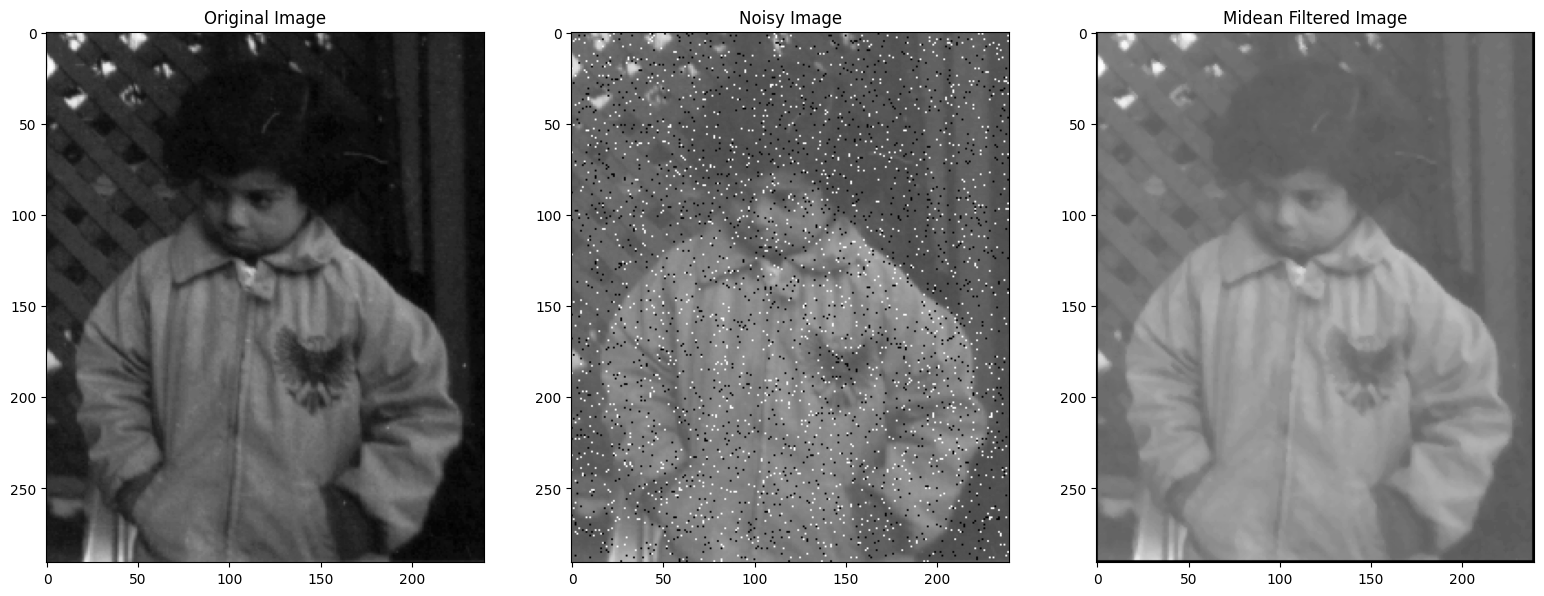

In [12]:
'''
(1) Your own median filter algorithm
'''
# def myMedianFilter(image, windowSize: tuple):
#     img = np.copy(image)
#     edgeX = windowSize[1]//2
#     edgeY = windowSize[0]//2
#     imgOut = np.zeros((img.shape[0], img.shape[1]))
#     for i in range(edgeX, img.shape[1] - edgeX):
#         for j in range(edgeY, img.shape[0] - edgeY):
#             colorArray = np.zeros((windowSize[0], windowSize[1]))
#             for fx in range(windowSize[1]):
#                 for fy in range(windowSize[0]):
#                     colorArray[fy][fx] = img[j + fy - edgeY][i + fx - edgeX]
#         imgOut[j][i] = np.median(colorArray)
#     return imgOut
def my_filter(image, window_size: tuple):
    img_f = np.copy(image)
    edge_x = window_size[1]//2
    edge_y = window_size[0]//2
    img_out = np.zeros((img_f.shape[0],img_f.shape[1]))
    for x in range(edge_x, img_f.shape[1] - edge_x):
        for y in range(edge_y, img_f.shape[0] - edge_y):
            color_array = np.zeros((window_size[0], window_size[1]))
            for fx in range(window_size[1]):
                for fy in range(window_size[0]):
                    color_array[fy][fx]=img_f[y+fy-edge_x][x+fx-edge_x]
            img_out[y][x] = np.median(color_array)
    return img_out

img = io.imread('pout.tif')
noiseImg = random_noise(image=img, mode='s&p', amount=0.05)
filteredImg = my_filter(np.array(noiseImg), (3,3))
print(filteredImg)
show_images([img, noiseImg, filteredImg],['Original Image', 'Noisy Image', 'Midean Filtered Image'])

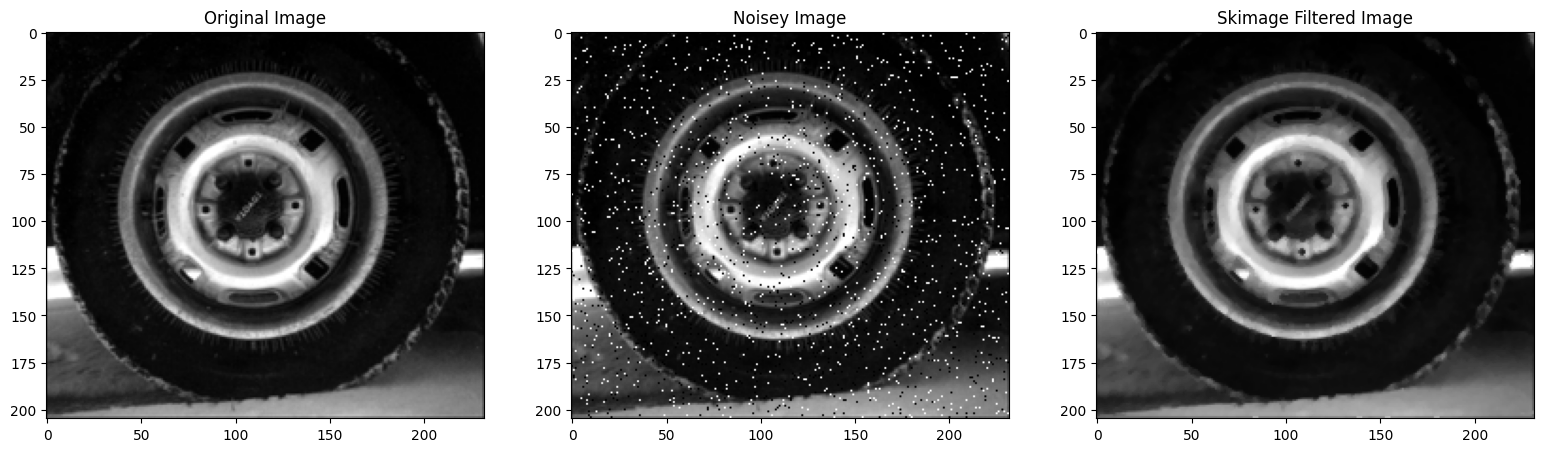

In [3]:
'''
(2) skimage median filter
'''
img = io.imread('tire.jpg')
noiseImg = random_noise(image=img, mode='s&p', amount=0.05)
skimageMedian = median(noiseImg)
show_images([img, noiseImg, skimageMedian],['Original Image', 'Noisey Image', 'Skimage Filtered Image'])


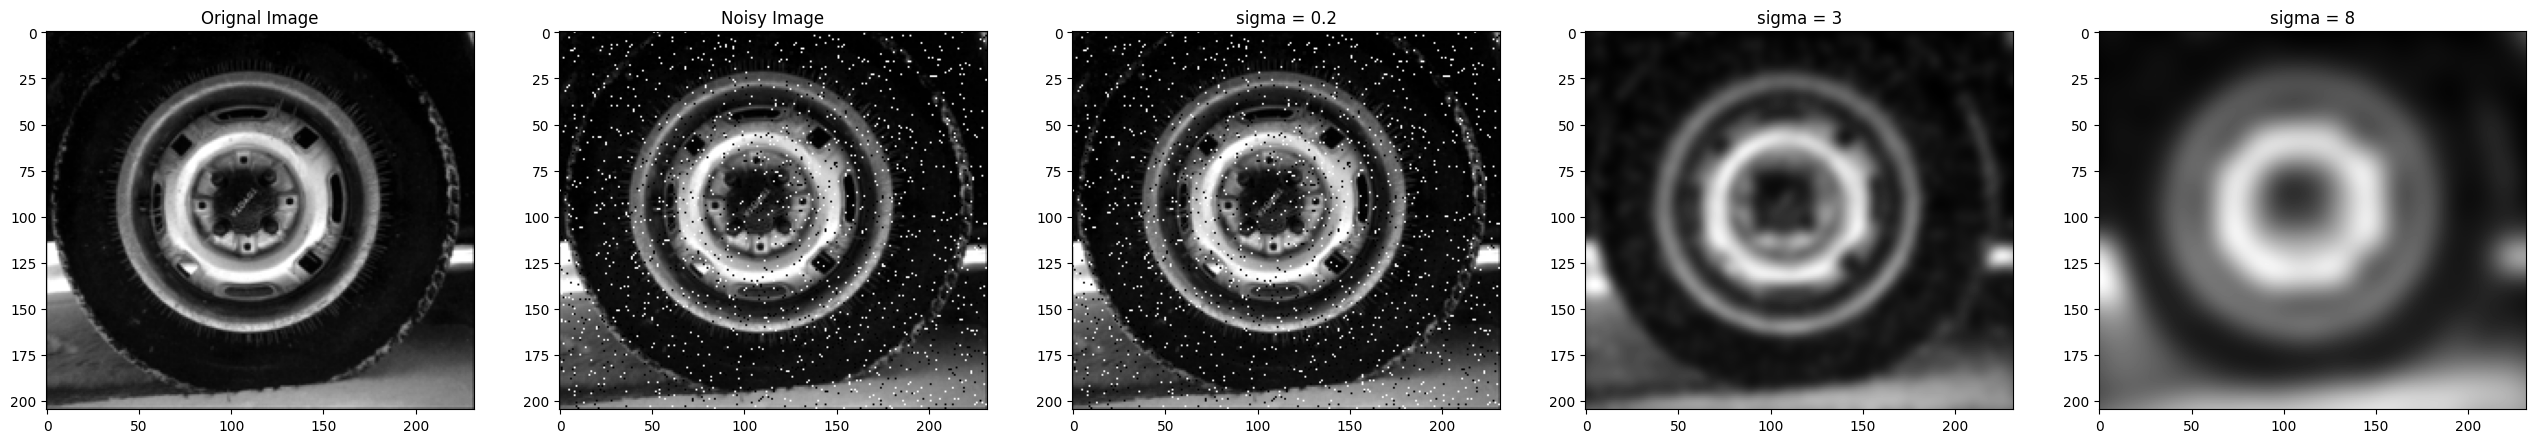

In [4]:
'''
(3) Gaussion Filters
'''
img = io.imread('tire.jpg')
show_images([img, noiseImg, gaussian(image=noiseImg, sigma=0.2), gaussian(image=noiseImg, sigma=3), gaussian(image=noiseImg, sigma=8)],
            ['Orignal Image', 'Noisy Image', 'sigma = 0.2', 'sigma = 3', 'sigma = 8'])